In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Reading a Data

In [2]:
data=pd.read_csv('heart.csv')
data.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
199,65,1,0,110,248,0,0,158,0,0.6,2,2,1,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0
170,56,1,2,130,256,1,0,142,1,0.6,1,1,1,0
201,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
191,58,1,0,128,216,0,0,131,1,2.2,1,3,3,0


## Data Exploration

In [3]:
data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [4]:
data['target'].unique()

array([1, 0], dtype=int64)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [6]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


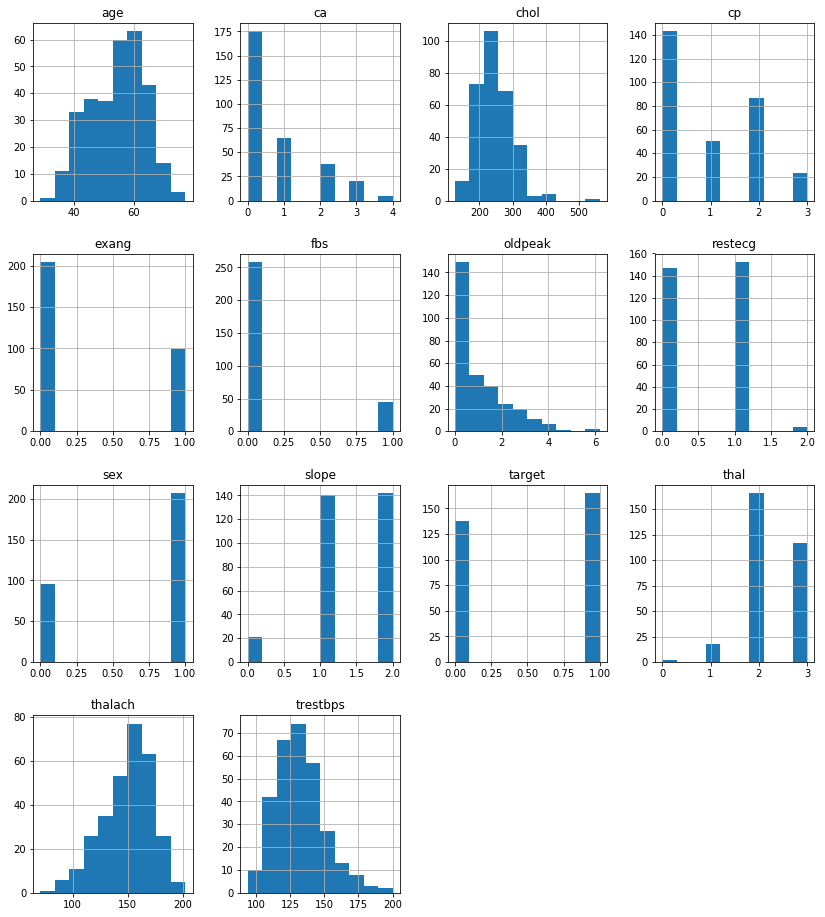

In [7]:
data.hist(figsize = (14,16))
plt.show()

In [8]:
data['target'].value_counts()
#1 = male; 0 = female

1    165
0    138
Name: target, dtype: int64

In [9]:
Have_Disease=len(data[data['target']==1])
Havent_Disease=len(data[data['target']==0])
print("Percentage of Patients Haven't Heart Disease: {:.2f}%".format((Havent_Disease / (len(data['target']))*100)))
print("Percentage of Patients Haven Heart Disease: {:.2f}%".format((Have_Disease / (len(data['target']))*100)))

Percentage of Patients Haven't Heart Disease: 45.54%
Percentage of Patients Haven Heart Disease: 54.46%


# Creating Model 

In [10]:
x_data=data.drop(['target'],axis=1)
y=data['target']

In [11]:
x=(x_data-np.min(x_data))/(np.max(x_data)-np.min(x_data) )#Normalize
#x=(x_data-np.mean(x_data))/(np.std(x_data))#stander diviation

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [17]:
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
clfs=[GaussianNB,SVC,LogisticRegression,RandomForestClassifier,KNeighborsClassifier,DecisionTreeClassifier]
clfs_str=["GaussianNB","SVC","LogisticRegression","RandomForest","KNeighbors","DecisionTree"]


In [18]:
score=[]
def model(clf,X_train,y_train):
    classifier = clf()
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)  # Predicting the Test set results
    score.append(classifier.score(X_test,y_test)*100)

In [19]:
i=0
for clf in clfs:
    model(clf,X_train,y_train)
    print(clfs_str[i]+": {:.2f}%".format(score[i]))
    i+=1

GaussianNB: 85.25%
SVC: 83.61%
LogisticRegression: 83.61%
RandomForest: 88.52%
KNeighbors: 86.89%
DecisionTree: 73.77%


In [21]:
a='5'+'5'
a

'55'